# Basic Image processing

## numpy

In [3]:
from PIL import Image
from numpy import *
from pylab import *

In [4]:
im = array(Image.open('image.jpg')) #import image and convert to array

In [5]:
print(im.shape, im.dtype)

(400, 300, 3) uint8


In [6]:
im1 = array(Image.open('image.jpg').convert('L'), 'f')

In [7]:
print(im1.shape, im1.dtype)

(400, 300) float32


## grayscale transformation

In [8]:
img = array(Image.open('image.jpg').convert('L'))

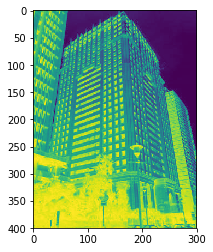

In [9]:
img1 =  255 - img
imshow(img1)

In [10]:
img1

array([[248, 253, 249, ...,  17,  17,  17],
       [245, 252, 243, ...,  17,  17,  17],
       [230, 240, 233, ...,  16,  16,  16],
       ...,
       [236, 223, 232, ..., 211, 200, 188],
       [232, 218, 227, ..., 205, 200, 196],
       [240, 224, 232, ..., 206, 205, 204]], dtype=uint8)

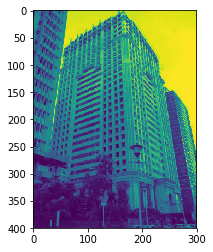

In [11]:
img2 = (100/255) * img + 100
imshow(img2)

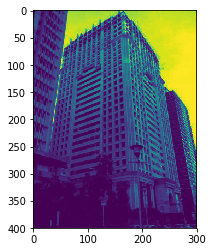

In [12]:
img3 = 255.0 * (img/255.0) ** 2
imshow(img3)

In [13]:
print(int(img.min()), int(img.max()))

0 255


### The reverse of the array() transformation can be using the PIL function 'fromarray()' as:

In [14]:
pil_im = Image.fromarray(img)

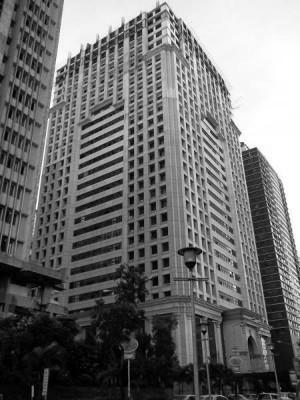

In [15]:
pil_im

### Image Resizing

In [16]:
def imresize(im, size):
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(size))


In [17]:
im_re= imresize(im, (600, 600))

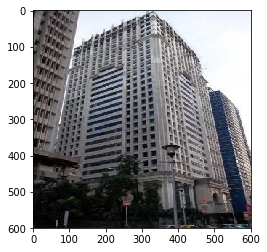

In [18]:
imshow(im_re)

### Histogram Equalizer 
A very useful example of a graylevel transformis histogramequalization. This transform
flattens the graylevel histogramof an image so that all intensities are as equally common
as possible. This is often a good way to normalize image intensity before further
processing and also a way to increase image contrast.
The transform function is, in this case, a cumulative distribution function (cdf) of the
pixel values in the image (normalized to map the range of pixel values to the desired
range).

In [24]:
def histeq(im,nbr_bins=256):
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    print('imhist :',imhist)
    cdf = imhist.cumsum()
    print('cdf : ',cdf, cdf[-1])
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    print('img: ', im2)
    print('img_flatten : ', im.flatten())
    return im2.reshape(im.shape), cdf

In [ ]:
img_hist, cdf = histeq(img)
img_hist



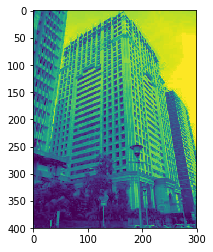

In [21]:
imshow(img_hist)

### averaging images
Averaging images is a simple way of reducing image noise and is also often used for
artistic effects. Computing an average image from a list of images is not difficult.
Assuming the images all have the same size, we can compute the average of all those
images by simply summing them up and dividing with the number of images

In [1]:
def compute_average(imlist):
    average = array(Image.open(imlist[0]), 'f')
    for i in imlist[1:]:
        try:
            average = average + array(Image.open(imlist[i]) )
        except :
            print(imlist[i] + '.....skipped')
    average = average / len(imlist)
    return array(average, 'unit8')         

### Using the Pickle Module
If you want to save some results or data for later use, the pickle module, which comes
with Python, is very useful. Pickle can take almost any Python object and convert it to
a string representation. This process is called pickling. Reconstructing the object from
the string representation is conversely called unpickling. This string representation can
then be easily stored or transmitted.